Imports

In [2]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import csv
import datetime

Functions

In [4]:
def initial_state_generator(L):
  state = np.zeros((L, L, L))

  for i in range(L):
    for j in range(L):
      for k in range(L):
        state[i, j, k] = rn.randrange(-1, 2, 2)

  return state


def calculate_magnetization(state, L):
  magnetization = 0

  for i in range(L):
    for j in range(L):
      for k in range(L):
        magnetization += state[i, j, k]

  return magnetization / (L**3)


def calculate_total_energy(state, L, J, B=0):
  energy = 0
  for i in range(L):
    for j in range(L):
      for k in range(L):
        i_prev = (i - 1) % L
        i_next = (i + 1) % L
        j_prev = (j - 1) % L
        j_next = (j + 1) % L
        k_prev = (k - 1) % L
        k_next = (k + 1) % L
        energy += -J * state[i, j, k] * (state[i_prev, j, k] + state[i_next, j, k] + state[i, j_prev, k] + state[i, j_next, k] + state[i, j, k_prev] + state[i, j, k_next])
        energy += -B * state[i, j, k]

  return energy / (2 * L**3)


def next_state_generator(state, L, site):
  site = np.array([rn.randint(0, L - 1), rn.randint(0, L - 1), rn.randint(0, L - 1)])
  site_spin = state[site[0], site[1], site[2]]
  # print(site, site_spin)
  if site_spin == 1:
    state[site[0], site[1], site[2]] = -1
  else:
    state[site[0], site[1], site[2]] = 1

  return state, site


def energy_change(current_state, next_state, site, L, J, B=0):
  i = site[0]
  j = site[1]
  k = site[2]

  i_prev = (i - 1) % L
  i_next = (i + 1) % L
  j_prev = (j - 1) % L
  j_next = (j + 1) % L
  k_prev = (k - 1) % L
  k_next = (k + 1) % L

  current_state_site_energy = -J * current_state[i, j, k] * (current_state[i_prev, j, k] + current_state[i_next, j, k] + current_state[i, j_prev, k] + current_state[i, j_next, k] + current_state[i, j, k_prev] + current_state[i, j, k_next])

  next_state_site_energy = -J * next_state[i, j, k] * (next_state[i_prev, j, k] + next_state[i_next, j, k] + next_state[i, j_prev, k] + next_state[i, j_next, k] + next_state[i, j, k_prev] + next_state[i, j, k_next])

  return next_state_site_energy - current_state_site_energy


def all_up_state_generator(L):
  state = np.zeros((L, L, L))

  for i in range(L):
    for j in range(L):
      for k in range(L):
        state[i, j, k] = 1

  return state


def all_down_state_generator(L):
  state = np.zeros((L, L, L))

  for i in range(L):
    for j in range(L):
      for k in range(L):
        state[i, j, k] = -1

  return state


def forward_difference_derivative(x_array, y_array):
  L = len(x_array)
  fwd_der = np.zeros((L - 1))

  for i in range(0, L-1):
    fwd_der[i] = (y_array[i + 1] - y_array[i]) / (x_array [i + 1] - x_array[i])
  
  return fwd_der


def backward_difference_derivative(x_array, y_array):
  L = len(x_array)
  bck_der = np.zeros((L - 1))

  for i in range(1, L):
    bck_der[i - 1] = (y_array[i] - y_array[i - 1]) / (x_array [i] - x_array[i - 1])
  
  return bck_der


def central_difference_derivative(x_array, y_array):
  N = len(x_array)
  cnt_der = np.zeros((N - 2))

  for i in range(1, N-1):
    cnt_der[i - 1] = (y_array[i + 1] - y_array[i - 1]) / (x_array [i + 1] - x_array[i - 1])
  
  return cnt_der


Initial Conditions

In [42]:
L = 10
J = 1
mc_steps = 10000
therm_steps = 4000
T = 5
# Boltzmann Constant, K_B = 1


# initial_state = initial_state_generator(L)
# print(initial_state)
# magnetization = calculate_magnetization(initial_state, L)
# print(magnetization)
# total_energy = calculate_total_energy(initial_state, L, J)
# print(total_energy)

Main Code

Metropolis Algorithm

In [ ]:
T_0 = 6
m = 0
T_max = 0.1
T_step_size = -0.1
L = 10
J = 1
therm_steps = 1000
mc_steps = 1000


temp_array = np.arange(T_0, T_max + T_step_size, T_step_size)
print(temp_array)
print(len(temp_array))
energy_by_T_array = np.zeros(len(temp_array))
magnetization_by_T_array = np.zeros(len(temp_array))


for T in temp_array:
  print(T)
  state = initial_state_generator(L)
  # state = all_up_state_generator(L)
  # state = all_down_state_generator(L)
  total_energy_array = np.zeros(((mc_steps // 10) + 1))
  magnetization_array = np.zeros(((mc_steps // 10) + 1))
  total_energy_array[0] = calculate_total_energy(state, L, J)
  magnetization_array[0] = calculate_magnetization(state, L)


  for l in range(therm_steps):
    for i in range(L):
      for j in range(L):
        for k in range(L):
          next_state = state.copy()
          next_state[i, j , k] = -1 * state[i, j, k]
          P_acc = np.exp(-1 * energy_change(state, next_state, [i, j, k], L, J) / T)

          if energy_change(state, next_state, [i, j, k], L, J) < 0:
            state = next_state
          
          elif rn.random() < P_acc:
            state = next_state

    # if (l + 1) % 10 == 0:
    #   total_energy_array[int((l + 1) / 10)] = calculate_total_energy(state, L, J)
    #   # print(l + 1)
    

  for l in range(mc_steps):
    for i in range(L):
      for j in range(L):
        for k in range(L):
          next_state = state.copy()
          next_state[i, j , k] = -1 * state[i, j, k]
          P_acc = np.exp(-1 * energy_change(state, next_state, [i, j, k], L, J) / T)

          if energy_change(state, next_state, [i, j, k], L, J) < 0:
            state = next_state

          elif rn.random() < P_acc:
            state = next_state

    if (l + 1) % 10 == 0:
      total_energy_array[int((l + 1) / 10)] = calculate_total_energy(state, L, J)
      magnetization_array[int((l + 1) / 10)] = calculate_magnetization(state, L)
      # print(l + 1)

  energy_by_T_array[m] = total_energy_array.mean()
  magnetization_by_T_array[m] = magnetization_array.mean()
  m += 1



# plt.plot(temp_array, energy_by_T_array)
# plt.xlabel("Temperature")
# plt.ylabel("Energy per Spin")
# plt.grid()

# plt.show()


# plt.plot(temp_array, magnetization_by_T_array)
# plt.xlabel("Temperature")
# plt.ylabel("Magnetization per Spin")
# plt.grid()

# plt.show()


filename = f"output_mpa_{therm_steps}_{mc_steps}_{datetime.datetime.now().strftime("%y-%m-%d-%H-%M-%S")}.csv"

combined_data = np.column_stack((temp_array, energy_by_T_array, magnetization_by_T_array))
header_line = "temp_array, energy_by_T_array, magnetization_by_T_array"
np.savetxt(filename, combined_data, delimiter=",", fmt="%.6f", header=header_line, comments="")

Heat Bath Algorithm

In [10]:
T_0 = 10
m = 0
T_max = 0.1
T_step_size = -0.1
L = 10
J = 1
therm_steps = 1000
mc_steps = 1000


temp_array = np.arange(T_0, T_max + T_step_size, T_step_size)
print(temp_array)
print(len(temp_array))
energy_by_T_array = np.zeros(len(temp_array))
magnetization_by_T_array = np.zeros(len(temp_array))


for T in temp_array:
  print(T)
  # state = initial_state_generator(L)
  state = all_up_state_generator(L)
  # state = all_down_state_generator(L)
  total_energy_array = np.zeros(((mc_steps // 10) + 1))
  magnetization_array = np.zeros(((mc_steps // 10) + 1))
  total_energy_array[0] = calculate_total_energy(state, L, J)
  magnetization_array[0] = calculate_magnetization(state, L)


  for l in range(therm_steps):
    for i in range(L):
      for j in range(L):
        for k in range(L):
          next_state = state.copy()
          next_state[i, j , k] = -1 * state[i, j, k]

          P_acc = 1 / (1 + np.exp(1 * energy_change(state, next_state, [i, j, k], L, J) / T))

          if energy_change(state, next_state, [i, j, k], L, J) < 0:
            state = next_state

          elif rn.random() < P_acc:
            state = next_state

    # if (l + 1) % 10 == 0:
    #   total_energy_array[int((l + 1) / 10)] = calculate_total_energy(state, L, J)
    #   # print(l + 1)
    

  for l in range(mc_steps):
    for i in range(L):
      for j in range(L):
        for k in range(L):
          next_state = state.copy()
          next_state[i, j , k] = -1 * state[i, j, k]

          P_acc = 1 / (1 + np.exp(1 * energy_change(state, next_state, [i, j, k], L, J) / T))

          if energy_change(state, next_state, [i, j, k], L, J) < 0:
            state = next_state

          elif rn.random() < P_acc:
            state = next_state

    if (l + 1) % 10 == 0:
      total_energy_array[int((l + 1) / 10)] = calculate_total_energy(state, L, J)
      magnetization_array[int((l + 1) / 10)] = calculate_magnetization(state, L)
      # print(l + 1)

  energy_by_T_array[m] = total_energy_array.mean()
  magnetization_by_T_array[m] = magnetization_array.mean()
  m += 1



# plt.plot(temp_array, energy_by_T_array)
# plt.xlabel("Temperature")
# plt.ylabel("Energy per Spin")
# plt.grid()

# plt.show()


# plt.plot(temp_array, magnetization_by_T_array)
# plt.xlabel("Temperature")
# plt.ylabel("Magnetization per Spin")
# plt.grid()

# plt.show()


filename = f"output_hba_{therm_steps}_{mc_steps}_{datetime.datetime.now().strftime("%y-%m-%d-%H-%M-%S")}.csv"

combined_data = np.column_stack((temp_array, energy_by_T_array, magnetization_by_T_array))
header_line = "temp_array, energy_by_T_array, magnetization_by_T_array"
np.savetxt(filename, combined_data, delimiter=",", fmt="%.6f", header=header_line, comments="")

[10.   9.9  9.8  9.7  9.6  9.5  9.4  9.3  9.2  9.1  9.   8.9  8.8  8.7
  8.6  8.5  8.4  8.3  8.2  8.1  8.   7.9  7.8  7.7  7.6  7.5  7.4  7.3
  7.2  7.1  7.   6.9  6.8  6.7  6.6  6.5  6.4  6.3  6.2  6.1  6.   5.9
  5.8  5.7  5.6  5.5  5.4  5.3  5.2  5.1  5.   4.9  4.8  4.7  4.6  4.5
  4.4  4.3  4.2  4.1  4.   3.9  3.8  3.7  3.6  3.5  3.4  3.3  3.2  3.1
  3.   2.9  2.8  2.7  2.6  2.5  2.4  2.3  2.2  2.1  2.   1.9  1.8  1.7
  1.6  1.5  1.4  1.3  1.2  1.1  1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3
  0.2  0.1]
100
10.0
9.9
9.8
9.700000000000001
9.600000000000001
9.500000000000002
9.400000000000002
9.300000000000002
9.200000000000003
9.100000000000003
9.000000000000004
8.900000000000004
8.800000000000004
8.700000000000005
8.600000000000005
8.500000000000005
8.400000000000006
8.300000000000006
8.200000000000006
8.100000000000007
8.000000000000007
7.9000000000000075
7.800000000000008
7.700000000000008
7.6000000000000085
7.500000000000009
7.400000000000009
7.30000000000001
7.20000000000001
7.1000

Post-Simulation Calculations

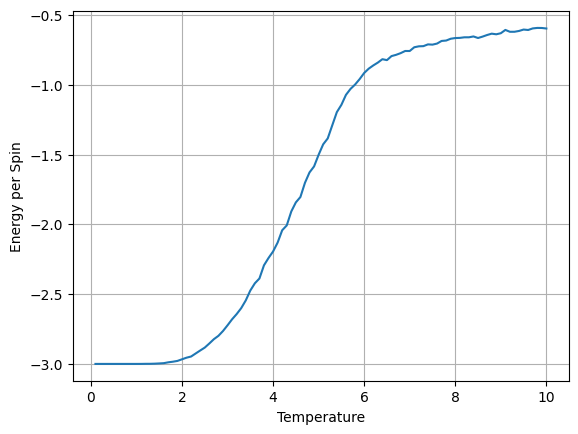

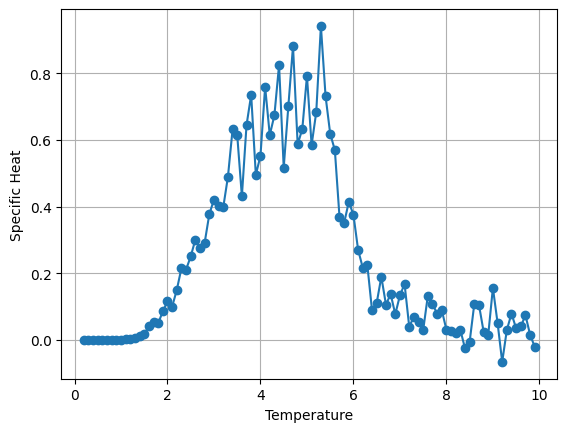

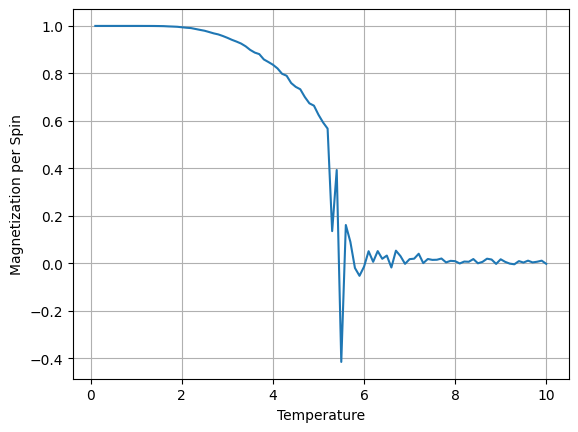

In [11]:
file_name = "output_hba_1000_1000_25-05-27-22-20-07.csv"

temp_array, energy_by_T_array, magnetization_by_T_array = np.genfromtxt(file_name, delimiter=',',skip_header=1, unpack=True, dtype=float)

# print("temp_array:")
# print(len(temp_array))
# print("\nenergy_by_T_array:")
# print(len(energy_by_T_array))
# print("\nmagnetization_by_T_array:")
# print(len(magnetization_by_T_array))
# spicic_heat_fwd_array = forward_difference_derivative(temp_array, energy_by_T_array)
# spicic_heat_bck_array = backward_difference_derivative(temp_array, energy_by_T_array)


plt.plot(temp_array, energy_by_T_array)
plt.xlabel("Temperature")
plt.ylabel("Energy per Spin")
plt.grid()

plt.show()


spicic_heat_cnt_array = central_difference_derivative(temp_array, energy_by_T_array)


# plt.plot(temp_array[:len(temp_array) - 1], spicic_heat_fwd_array, marker='o')
# plt.plot(temp_array[:len(temp_array) - 1], spicic_heat_bck_array, marker='o')
plt.plot(temp_array[1:len(temp_array) - 1], spicic_heat_cnt_array, marker='o')
plt.xlabel("Temperature")
plt.ylabel("Specific Heat")
plt.grid()

plt.show()


plt.plot(temp_array, magnetization_by_T_array)
plt.xlabel("Temperature")
plt.ylabel("Magnetization per Spin")
plt.grid()

plt.show()

Extras

In [ ]:
T_0 = 0.1
m = 0
T_max = 6
T_step_size = 0.1
L = 10
J = 1
mc_steps = 1000
therm_steps = 1000


temp_array = np.arange(T_0, T_max + T_step_size, T_step_size)
print(temp_array)
print(len(temp_array))
magnetization_by_T_array = np.zeros(len(temp_array))


for T in temp_array:
  print(T)
  state = initial_state_generator(L)
  # state = all_up_state_generator(L)
  # state = all_down_state_generator(L)
  magnetization_array = np.zeros(((mc_steps // 10) + 1))
  magnetization_array[0] = calculate_magnetization(state, L, J)


  for l in range(therm_steps):
    for i in range(L):
      for j in range(L):
        for k in range(L):
          next_state = state.copy()
          next_state[i, j , k] = -1 * state[i, j, k]

          if energy_change(state, next_state, [i, j, k], L, J) < 0:
            state = next_state

          elif rn.random() < np.exp(-1 * energy_change(state, next_state, [i, j, k], L, J) / T):
            state = next_state

    # if (l + 1) % 10 == 0:
    #   total_energy_array[int((l + 1) / 10)] = calculate_total_energy(state, L, J)
    #   # print(l + 1)
    

  for l in range(mc_steps):
    for i in range(L):
      for j in range(L):
        for k in range(L):
          next_state = state.copy()
          next_state[i, j , k] = -1 * state[i, j, k]

          if energy_change(state, next_state, [i, j, k], L, J) < 0:
            state = next_state

          elif rn.random() < np.exp(-1 * energy_change(state, next_state, [i, j, k], L, J) / T):
            state = next_state

    if (l + 1) % 10 == 0:
      magnetization_array[int((l + 1) / 10)] = calculate_magnetization(state, L, J)
      # print(l + 1)

  magnetization_by_T_array[m] = magnetization_array.mean()
  m += 1



plt.plot(temp_array, magnetization_by_T_array)
plt.xlabel("Temperature")
plt.ylabel("Magnetization per Spin")
plt.grid()

plt.show()

In [ ]:
state = initial_state_generator(L)
# state = all_up_state_generator(L)
# state = all_down_state_generator(L)
total_energy_array = np.zeros(((therm_steps // 10) + 1))
total_energy_array[0] = calculate_total_energy(state, L, J)
mc_step_array = np.zeros(((therm_steps // 10) + 1))


for l in range(therm_steps):
  for i in range(L):
    for j in range(L):
      for k in range(L):
        next_state = state.copy()
        next_state[i, j , k] = -1 * state[i, j, k]

        if energy_change(state, next_state, [i, j, k], L, J) < 0:
          state = next_state

        elif rn.random() < np.exp(-1 * energy_change(state, next_state, [i, j, k], L, J) / T):
          state = next_state

  if (l + 1) % 10 == 0:
    total_energy_array[int((l + 1) / 10)] = calculate_total_energy(state, L, J)
    mc_step_array[int((l + 1) / 10)] = l + 1
    # print(l + 1)


plt.plot(mc_step_array, total_energy_array, label=f"Mean Energy per Spin: {total_energy_array.mean().round(3)}")
plt.xlabel("Monte Carlo Step")
plt.ylabel("Energy per Spin")
plt.grid()
plt.legend()

plt.show()
# print(total_energy_array.mean())


In [ ]:
T_0 = 1
m = 0
T_max = 10
T_step_no = 100

temp_array = np.linspace(T_0, T_max, T_step_no)
print(temp_array)
energy_by_T_array = np.zeros(len(temp_array))


for T in temp_array:
  print(T)
  state = initial_state_generator(L)
  # state = all_up_state_generator(L)
  # state = all_down_state_generator(L)
  total_energy_array = np.zeros(((therm_steps // 10) + 1))
  total_energy_array[0] = calculate_total_energy(state, L, J)
  mc_step_array = np.zeros(((therm_steps // 10) + 1))


  for l in range(therm_steps):
    for i in range(L):
      for j in range(L):
        for k in range(L):
          next_state = state.copy()
          next_state[i, j , k] = -1 * state[i, j, k]

          if energy_change(state, next_state, [i, j, k], L, J) < 0:
            state = next_state

          elif rn.random() < np.exp(-1 * energy_change(state, next_state, [i, j, k], L, J) / T):
            state = next_state

    if (l + 1) % 10 == 0:
      total_energy_array[int((l + 1) / 10)] = calculate_total_energy(state, L, J)
      mc_step_array[int((l + 1) / 10)] = l + 1
      # print(l + 1)

  energy_by_T_array[m] = total_energy_array.mean()
  m += 1



plt.plot(temp_array, energy_by_T_array)
plt.xlabel("Temperature")
plt.ylabel("Total Energy")

plt.show()
# # print(total_energy_array.mean())

### Trash Can

In [ ]:
state = initial_state_generator(L)
# state = all_up_state_generator(L)
# state = all_down_state_generator(L)
total_energy_array = np.zeros(((therm_steps // 10) + 1))
total_energy_array[0] = calculate_total_energy(state, L, J)
mc_step_array = np.zeros(((therm_steps // 10) + 1))


for i in range(therm_steps):
  next_state, site = next_state_generator(state, L)

  if energy_change(state, next_state, site, L, J) < 0:
    state = next_state

  elif rn.random() < np.exp(-1 * energy_change(state, next_state, site, L, J) / T):
    state = next_state

  if (i + 1) % 10 == 0:
    total_energy_array[int((i + 1) / 10)] = calculate_total_energy(state, L, J)
    mc_step_array[int((i + 1) / 10)] = i + 1
    # print(total_energy_array[int((i + 1) / 10)])
    # print(i + 1)

plt.plot(mc_step_array, total_energy_array)
plt.xlabel("Monte Carlo Step")
plt.ylabel("Total Energy")

plt.show()
print(total_energy_array.mean())

Test

In [ ]:
L = 100
mc_steps = 1000
state = initial_state_generator(L)
states = np.zeros((mc_steps + 1, L, L, L))
states[0] = state

for i in range(mc_steps):
  print(i + 1)
  state = next_state_generator(state, L)
  states[i + 1] = state
  # print(state)

print("Memory size of numpy array in bytes: ",states.size * states.itemsize/1024/1024)